In [ ]:
# Install Kaggle in Colab (if not already installed)
!pip install kaggle

# Create a Kaggle directory and move the kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the Iris dataset from Kaggle
!kaggle datasets download -d uciml/iris
!unzip iris.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 5.07MB/s]
Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Nhập dữ liệu của bạn để dự đoán:
Nhập chiều dài đài hoa (cm): 5
Nhập chiều rộng đài hoa (cm): 3
Nhập chiều dài cánh hoa (cm): 1
Nhập chiều rộng cánh hoa (cm): 0.2
Loài hoa được dự đoán là: Iris-setosa


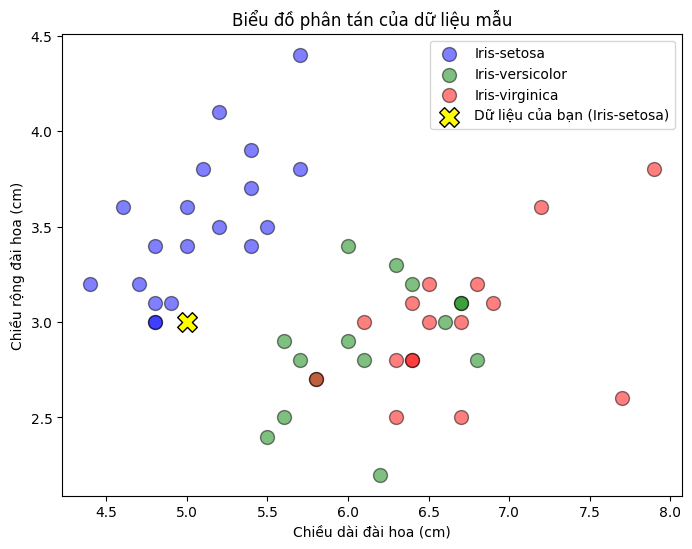

In [8]:
# Load the Iris dataset
df = pd.read_csv("Iris.csv")

# Preprocess the dataset
X = df.drop(columns=["Species", "Id"])  # Features
y = df["Species"]  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Function to input custom data, classify, and plot it
def classify_and_plot():
    print("Nhập dữ liệu của bạn để dự đoán:")
    sepal_length = float(input("Nhập chiều dài đài hoa (cm): "))
    sepal_width = float(input("Nhập chiều rộng đài hoa (cm): "))
    petal_length = float(input("Nhập chiều dài cánh hoa (cm): "))
    petal_width = float(input("Nhập chiều rộng cánh hoa (cm): "))

    # Prepare input data as a DataFrame with proper column names
    custom_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                               columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

    # Make prediction
    prediction = knn.predict(custom_data)
    print(f"Loài hoa được dự đoán là: {prediction[0]}")

    # Plot the custom input point with a subset of the dataset
    plot_custom_data(custom_data, prediction[0])

# Plot function that includes sample data points and user's data point
def plot_custom_data(custom_data, prediction):
    # Get random sample from the dataset for visualization
    sample_df = df.sample(n=50, random_state=42)
    species_colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}

    # Plot the random sample points from the dataset
    plt.figure(figsize=(8, 6))
    for species, color in species_colors.items():
        species_data = sample_df[sample_df['Species'] == species]
        plt.scatter(species_data['SepalLengthCm'], species_data['SepalWidthCm'],
                    label=species, color=color, s=100, alpha=0.5, edgecolor='k')

    # Plot the user's input point
    plt.scatter(custom_data['SepalLengthCm'], custom_data['SepalWidthCm'],
                label=f'Dữ liệu của bạn ({prediction})', color='yellow', s=200, edgecolor='k', marker='X')

    # Add labels, title, and legend (in Vietnamese)
    plt.xlabel('Chiều dài đài hoa (cm)')
    plt.ylabel('Chiều rộng đài hoa (cm)')
    plt.title('Biểu đồ phân tán của dữ liệu mẫu')
    plt.legend(loc='upper right')
    plt.show()

# Call the function to classify custom data and plot it
classify_and_plot()